In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
comments=pd.read_csv('C:\\Users\HP\\Desktop\\T&C Development\\Data Analytics Projects\\1-Youtube Text Data Analysis\\GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

Sentiment Analysis of YouTube Comments

In [ ]:
#!pip install textblob : is NLP library

In [5]:
# Drop null columns by findng out first
comments.isnull()              

video_id  comment_text  likes  replies
0          False         False  False    False
1          False         False  False    False
2          False         False  False    False
3          False         False  False    False
4          False         False  False    False
...          ...           ...    ...      ...
718447     False         False  False    False
718448     False         False  False    False
718449     False         False  False    False
718450     False         False  False    False
718451     False         False  False    False

[718452 rows x 4 columns]

In [8]:
# To see everything
comments.isnull().sum()  
#Only comment_text has null so let's drop them

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
comments.dropna(inplace=True)

In [27]:
comments.describe()

likes        replies
count  718424.000000  718424.000000
mean        5.237658       0.381264
std       203.887864       8.968133
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max     60630.000000     521.000000

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [23]:
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment 

Sentiment(polarity=0.45000000000000007, subjectivity=0.5666666666666667)

In [24]:
#The above is just for one comment, loop is needed to get polarity for all the comments
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.subjectivity

0.5666666666666667

In [25]:
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.polarity

0.45000000000000007

In [26]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
polarity=[] # list which will contain the polarity of the comments
for comment in comments['comment_text']:
     polarity.append(TextBlob(comment).sentiment.polarity) #Note, this may throw some error and give some excemption

In [28]:
polarity=[]  
for comment in comments['comment_text']:
    try: 
         polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [29]:
comments['polarity']=polarity

In [33]:
comments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  polarity  
0        0  0.450000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  1.000000  
5        0  0.300000  
6        0  0.000000  
7        0 -0.100000  
8        0  0.028571  
9        0  0.500000

In [ ]:
'''
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
For more read up : https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/
'''

# POSITIVE REVIEW

In [35]:
### Let's work on positive statement by filtering them out
positive_comments=comments[comments['polarity']==1]

In [42]:
positive_comments 

video_id                                       comment_text  likes  \
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26      jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80      jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158     YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175     YPVcg45W0z4                        Welcome to the Scandiworld!      0   
...             ...                                                ...    ...   
718390  lLN1FwiqGwc  I'm just stopping the video three minutes in t...      0   
718416  lLN1FwiqGwc  Beating up tommy wiseu was the best part of th...      0   
718432  lLN1FwiqGwc                         kudos for the mtg cards :D      0   
718440  lLN1FwiqGwc                   Tommy Wiseau is my greatest fear      0   
718443  lLN1FwiqGwc                                           The best      0   

        replies  polarity  
4             0       1.0  
26            2       1.0  
80            1       1.0  
158           0       1.0  
175           0       1.0  
...         ...       ...  
718390        0       1.0  
718416        0       1.0  
718432        0       1.0  
718440        0       1.0  
718443        0       1.0  

[20400 rows x 5 columns]

In [37]:
positive_comments.shape

(20400, 5)

In [38]:
# Now let's use worldcloud to represent them...let's install
!pip install wordcloud

In [39]:
from wordcloud import WordCloud,STOPWORDS

In [40]:
stopwords=set(STOPWORDS)

In [ ]:
'''
A word cloud (also known as a tag cloud) is a visual representation of words.
Cloud creators are used to highlight popular words and phrases based on frequency and relevance.
They provide you with quick and simple visual insights that can lead to more in-depth analyses.
The thng behing worldcloud is, the most of them will have the biggest font
The bigger the font, the higher d peculiarity or priority or probability
Stopwords are the words that doesn't make sense in our analysis and we need to get rid of them using "stopwords=set(STOPWORDS)"
'''

In [ ]:
'''
What we need is strings, so how do we get that only?
We can use loop to iterate or bring it out as series (positive_comments['comment_text']), then make as dataframe or use join
'''

In [43]:
positive_comments['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [44]:
total_comments=' '.join(positive_comments['comment_text'])

In [45]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [151]:
total_comments.count('good')

349

In [48]:
#Now worldcloud
#wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)
wordcloud=WordCloud().generate(total_comments)

(-0.5, 399.5, 199.5, -0.5)

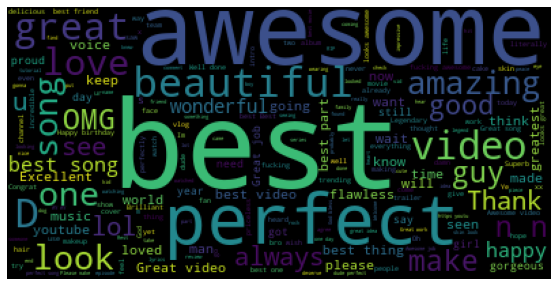

In [54]:
wordcloud
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.axis('off') #on will show numbers on the axis

# NEGATIVE REVIEW

In [56]:
negative_comments=comments[comments['polarity']==-1]
negative_comments

video_id                                       comment_text  likes  \
1387    ql0Op1VcELw                                             boring      0   
1394    ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530    -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745    F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793    F2uJvwiSZAQ                                      Thats insane.      0   
...             ...                                                ...    ...   
717296  t8sgy0faXyg                                           Terrible      0   
717668  LunHybOKIjU                     this is terrible em you are 50      0   
717716  AUP3uhrM19c                  Not a penalty terrible decision!!      0   
717903  8pHPohFezIk                                Hazard was terrible      0   
718356  lLN1FwiqGwc         You are nuts. The leper looked terrifying.      0   

        replies  polarity  
1387          0      -1.0  
1394          1      -1.0  
1530          0      -1.0  
1745          0      -1.0  
1793          0      -1.0  
...         ...       ...  
717296        0      -1.0  
717668        0      -1.0  
717716        0      -1.0  
717903        0      -1.0  
718356        0      -1.0  

[3339 rows x 5 columns]

In [57]:
total_comments2 =' '.join(negative_comments['comment_text'])
total_comments2

"boring 0:22   **laughs at terrible pun** this is the worst thing i've heard. ever. People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect. Thats insane. How is this trending ? Awful Butthurt Sean, idiot! Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!! Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everything Please let this die, you can tell the actors are miserable. can't wait :'( Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nasty Handmaids Tale was boring, I found I won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic! all the products are horrible jim carrey lost it, became a boring socialist hippy Winner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons. Terrible, at times like this we need to come together not s

(-0.5, 399.5, 199.5, -0.5)

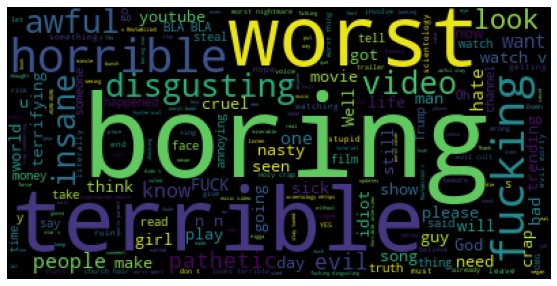

In [58]:
wordcloud=WordCloud().generate(total_comments2)
wordcloud
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.axis('off')

# Performing emoji's Analysis

In [59]:
! pip install emoji

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171030 sha256=beb9a749da184178966c1f6b7791054020d4054ed020425e59428927d7a794e2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\5e\8c\80\c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [60]:
import emoji

In [61]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [62]:
# Note, there are unicodes for emojis e.g
# grinning face #https://www.geeksforgeeks.org/python-program-to-print-emojis/
print("\U0001f600")

😀


In [66]:
#Now we have to extract all emojis in our data by iteration..code of list comprehension
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

<ipython-input-66-12cc4513603f>:2: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  [c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]


[]

In [69]:
emoji_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

<ipython-input-69-c4560403eb67>:4: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if char in emoji.UNICODE_EMOJI_ENGLISH:


In [70]:
len(emoji_list)

333278

In [71]:
emoji_list[0:10] #Now we need it as as dictionary, u can do it from scratch or use collection model so that each emojis will show
#its frequency i.e number of occurence 


['😂', '😂', '😂', '😭', '😭', '😭', '😢', '😢', '😢', '❤']

In [72]:
from collections import Counter

In [73]:
Counter(emoji_list) #This will give us as dictionary

Counter({'😂': 43947,
         '😭': 9098,
         '😢': 2074,
         '❤': 36780,
         '👏': 5357,
         '👇': 297,
         '🌞': 119,
         '😎': 1412,
         '😣': 478,
         '😥': 860,
         '😫': 782,
         '✌': 859,
         '👎': 712,
         '🏻': 4412,
         '🖕': 1019,
         '😘': 6334,
         '▶': 55,
         '⏭': 6,
         '⏮': 6,
         '◀': 8,
         '🔥': 10249,
         '😊': 4946,
         '🤔': 1734,
         '😜': 684,
         '😍': 34856,
         '😅': 1977,
         '😏': 636,
         '💔': 652,
         '🤣': 2374,
         '✨': 1298,
         '🌈': 531,
         '💗': 3071,
         '💖': 4809,
         '🐢': 24,
         '😉': 1153,
         '😻': 1363,
         '🤗': 1128,
         '👌': 3534,
         '🏼': 2961,
         '😩': 1924,
         '🙊': 186,
         '♥': 7173,
         '💙': 2968,
         '😱': 2316,
         '😛': 340,
         '🌳': 10,
         '🌽': 46,
         '🎃': 715,
         '🚣': 7,
         '🚂': 11,
         '😕': 502,
         '😋':

In [75]:
Counter(emoji_list).most_common() #Most commnly used 

[('😂', 43947),
 ('❤', 36780),
 ('😍', 34856),
 ('🔥', 10249),
 ('😭', 9098),
 ('♥', 7173),
 ('💕', 6531),
 ('😘', 6334),
 ('👍', 5817),
 ('😬', 5489),
 ('👏', 5357),
 ('😊', 4946),
 ('💖', 4809),
 ('🏻', 4412),
 ('💜', 3616),
 ('👌', 3534),
 ('💗', 3071),
 ('💙', 2968),
 ('🏼', 2961),
 ('🙌', 2734),
 ('😁', 2504),
 ('🤣', 2374),
 ('😱', 2316),
 ('💛', 2169),
 ('💚', 2138),
 ('😢', 2074),
 ('😅', 1977),
 ('😩', 1924),
 ('🙏', 1886),
 ('🏽', 1875),
 ('💯', 1796),
 ('😀', 1788),
 ('🤔', 1734),
 ('💓', 1579),
 ('😄', 1541),
 ('☺', 1481),
 ('😆', 1423),
 ('😎', 1412),
 ('💞', 1393),
 ('😻', 1363),
 ('😃', 1327),
 ('✨', 1298),
 ('💪', 1289),
 ('🏾', 1241),
 ('😉', 1153),
 ('😙', 1139),
 ('🤗', 1128),
 ('🖕', 1019),
 ('💋', 963),
 ('💿', 929),
 ('💀', 892),
 ('😥', 860),
 ('✌', 859),
 ('🎶', 855),
 ('👑', 853),
 ('🎉', 833),
 ('🔴', 819),
 ('🔵', 803),
 ('🖤', 802),
 ('😫', 782),
 ('🙄', 765),
 ('🌹', 750),
 ('💘', 739),
 ('🎈', 736),
 ('🤘', 731),
 ('🎃', 715),
 ('👎', 712),
 ('😜', 684),
 ('😔', 662),
 ('💔', 652),
 ('♀', 650),
 ('❣', 647),
 ('💩', 638),

In [76]:
Counter(emoji_list).most_common(20) #Most commnly used, top 20

[('😂', 43947),
 ('❤', 36780),
 ('😍', 34856),
 ('🔥', 10249),
 ('😭', 9098),
 ('♥', 7173),
 ('💕', 6531),
 ('😘', 6334),
 ('👍', 5817),
 ('😬', 5489),
 ('👏', 5357),
 ('😊', 4946),
 ('💖', 4809),
 ('🏻', 4412),
 ('💜', 3616),
 ('👌', 3534),
 ('💗', 3071),
 ('💙', 2968),
 ('🏼', 2961),
 ('🙌', 2734)]

In [77]:
#Not to access the key indexing
Counter(emoji_list).most_common(20)[0] #index zero

('😂', 43947)

In [80]:
Counter(emoji_list).most_common(20)[3][0] #This will show emoji & its freqs

('🔥', 10249)

In [86]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [87]:
emojis

['😂', '❤', '😍', '🔥', '😭', '♥', '💕', '😘', '👍', '😬']

In [90]:
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [91]:
freqs

[43947, 36780, 34856, 10249, 9098, 7173, 6531, 6334, 5817, 5489]

In [94]:
# Now let's plot
import plotly.graph_objs as go
from plotly.offline import iplot

In [95]:
trace = go.Bar(x=emojis,y=freqs)

In [97]:
iplot([trace])

# Analyzing  Tags column,what are trending tags on youtube

In [101]:
#read dataset
videos =pd.read_csv('C:\\Users\HP\\Desktop\\T&C Development\\Data Analytics Projects\\1-Youtube Text Data Analysis\\GBvideos.csv', error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [102]:
videos.head()

video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   

       channel_title  category_id  \
0        Apple Event           28   
1       This Morning           24   
2       emmablackery           24   
3              ProZD            1   
4  Sprinkleofglitter           26   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   
2  emmablackery|emma blackery|emma|blackery|briti...   142819  13119   
3  skit|korean|language|conversation|esl|japanese...  1580028  65729   
4  sprinkleofglitter|sprinkle of glitter|baby gli...    40592   5019   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   
2       151           1141     https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg   
3      1529           3598     https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg   
4        57            490     https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [103]:
videos['category_id'].unique() #Unique numbers

array([28, 24,  1, 26, 17, 22, 10, 23, 27, 25, 20,  2, 15, 29, 19],
      dtype=int64)

In [104]:
tags_complete=' '.join(videos['tags'])

In [105]:
tags_complete

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [106]:
import re

In [107]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [108]:
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [109]:
tags=re.sub(' +',' ',tags)

In [110]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

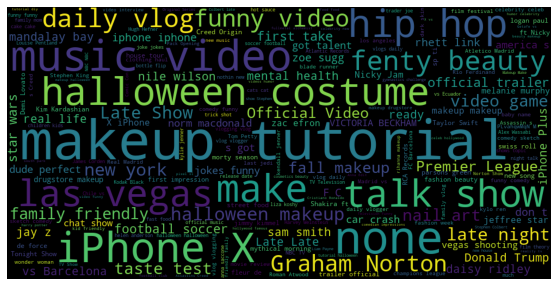

In [111]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Lets find out the relation among continuous variables
As quite obvious the number of likes have very strong relation with views

Text(0.5, 1.0, 'Regression plot for views & likes')

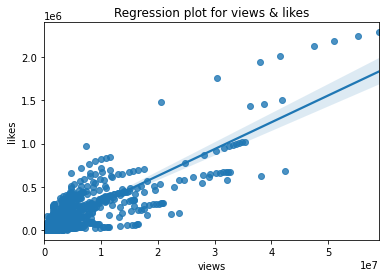

In [112]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

## dislikes vs views Analysis

Text(0.5, 1.0, 'Regression plot for views & dislikes')

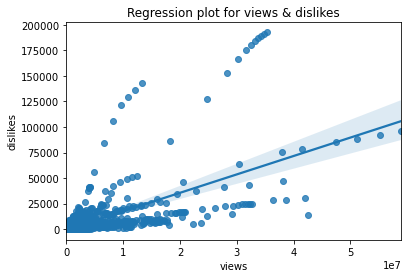

In [113]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [114]:
# Correlation matrix is the evidence of above analysis!
df_corr=videos[['views','likes','dislikes']]
df_corr.corr()

views     likes  dislikes
views     1.000000  0.866249  0.671703
likes     0.866249  1.000000  0.623797
dislikes  0.671703  0.623797  1.000000

<AxesSubplot:>

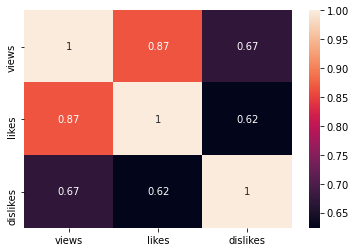

In [115]:
sns.heatmap(df_corr.corr(),annot=True)

In [ ]:
'''
Which channel(channel_title) have the largest trending videos
'''

In [118]:
videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False) 
#Now we can see channels 

channel_title
The Tonight Show Starring Jimmy Fallon    40
First We Feast                            40
jacksfilms                                39
PointlessBlogVlogs                        38
The Late Late Show with James Corden      38
                                          ..
Lil Durk                                   1
CNCOVEVO                                   1
CMA Country Music Association              1
The Game Theorists                         1
Guinness World Records                     1
Name: video_id, Length: 1003, dtype: int64

In [119]:
#Make as dataframe
videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index

video_id
channel_title                                   
The Tonight Show Starring Jimmy Fallon        40
First We Feast                                40
jacksfilms                                    39
PointlessBlogVlogs                            38
The Late Late Show with James Corden          38
...                                          ...
Lil Durk                                       1
CNCOVEVO                                       1
CMA Country Music Association                  1
The Game Theorists                             1
Guinness World Records                         1

[1003 rows x 1 columns]

In [121]:
videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index()

channel_title  video_id
0     The Tonight Show Starring Jimmy Fallon        40
1                             First We Feast        40
2                                 jacksfilms        39
3                         PointlessBlogVlogs        38
4       The Late Late Show with James Corden        38
...                                      ...       ...
998                                 Lil Durk         1
999                                 CNCOVEVO         1
1000           CMA Country Music Association         1
1001                      The Game Theorists         1
1002                  Guinness World Records         1

[1003 rows x 2 columns]

In [124]:
#rename
cdf = videos.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [125]:
cdf

channel_title  total_videos
0     The Tonight Show Starring Jimmy Fallon            40
1                             First We Feast            40
2                                 jacksfilms            39
3                         PointlessBlogVlogs            38
4       The Late Late Show with James Corden            38
...                                      ...           ...
998                                 Lil Durk             1
999                                 CNCOVEVO             1
1000           CMA Country Music Association             1
1001                      The Game Theorists             1
1002                  Guinness World Records             1

[1003 rows x 2 columns]

In [126]:
import plotly.express as px #plot first 20

In [127]:
px.bar(data_frame=cdf[0:20],x ='channel_title', y ='total_videos')

In [128]:
'''
Does punctuation in title or tags affect likes or dislikes comments?
Extract punctuations
'''

# I dont understand this part

In [129]:
import string

In [130]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [133]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [135]:
videos['title'] 

0       Live Apple Event - Apple September Event 2017 ...
1       Holly and Phillip Meet Samantha the Sex Robot ...
2                         My DNA Test Results! I'm WHAT?!
3       getting into a conversation in a language you ...
4                                    Baby Name Challenge!
                              ...                        
7988                           DJ Cummerbund - Hey Trump!
7989    Emotional Groom Start Crying When He Sees Brid...
7990                       FALLING IN LOVE WITH SANTORINI
7991         Hey Ya! - Walk off the Earth (Outkast Cover)
7992                         It (2017) - Nostalgia Critic
Name: title, Length: 7993, dtype: object

In [136]:
text = ['Live Apple Event - Apple September Event 2017 ...']

In [137]:
punc_count(text)

0

In [146]:
tit = videos['title'] 

In [149]:
tit.apply(punc_count)

0       5
1       1
2       4
3       1
4       1
       ..
7988    2
7989    1
7990    0
7991    4
7992    3
Name: title, Length: 7993, dtype: int64

In [140]:
tit['count_punc']=tit.apply(punc_count)

<ipython-input-140-4bd0f48044c9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
tit.head()

0    Live Apple Event - Apple September Event 2017 ...
1    Holly and Phillip Meet Samantha the Sex Robot ...
2                      My DNA Test Results! I'm WHAT?!
3    getting into a conversation in a language you ...
4                                 Baby Name Challenge!
Name: title, dtype: object